

# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb) from 1960 to 2015, including user ratings, budget and revenue.I would like to find other intresting patterns in the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will loading my data, check for cleanliness, and then clean my dataset for my analysis.


### General Properties

Total Rows = 10866
Total Columns = 21
After Seeing the dataset we can say that some columns is contain null values

In [53]:
#Load the dataset
#print/review the last 5 row of the dataset
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [55]:
#print/review the last 5 row of the dataset
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [56]:
#to check/know to number of row and column 
df.shape

(10866, 21)

In [57]:
#print the Summary of the dataset 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [58]:
#this returns the number of unique values for each column.
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [59]:
#sum of duplicated row 
sum(df.duplicated())

1

In [60]:
# to inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [61]:
#review/print sum of null values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


After carefully inspecting and assessing my data. I discovered the following:

1. One duplicate
2. Null values
3. The release date is not in date-time format 
4. My genres column contain multiples genres for each movie seperated by '|'
5. I dont need some columns for my analysis

## Data Cleaning 

In this session of my analysis, I will be addressing and fixing the following:

1. Dropping the columns i wont be using for my analysis 
2. Change release_date to date_time format
3. fill null values
4. splitting the genre in the column

In [5]:
#i drop row which i didn't need and which contain incorrect values
movies = df[['id',
             'popularity',
             'budget',
             'revenue',
             'original_title',
             'director',
             'runtime',
             'genres',
             'production_companies',
             'release_date',
             'release_year']]

In [28]:
movies.to_csv('Movies.csv', index=False)

In [29]:
df = pd.read_csv('Movies.csv')

In [30]:
#drop this row also
df.drop(['production_companies'], axis=1, inplace=True)

In [31]:
# review the first 5 row of the remaining column 
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [32]:
#i changed the release_date format to datetime format
df['release_date']= pd.to_datetime(df['release_date'])

In [33]:
# review the first row of the remaining column
df.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [34]:
#After removing unused columns, i have (row:10866, columns:14 )
df.shape

(10866, 10)

In [35]:
#review information about the remaining columns in dataset, director and genres column have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   budget          10866 non-null  int64         
 3   revenue         10866 non-null  int64         
 4   original_title  10866 non-null  object        
 5   director        10822 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   release_year    10866 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 849.0+ KB


In [36]:
#fill missing values for director column
df['director']= df['director'].fillna(method= 'ffill')

In [37]:
#fill missing values for genres columns
df['genres']= df['genres'].fillna(method= 'ffill')

In [38]:
#review dataset again to confirm if missing value has been fixed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   budget          10866 non-null  int64         
 3   revenue         10866 non-null  int64         
 4   original_title  10866 non-null  object        
 5   director        10866 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10866 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   release_year    10866 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 849.0+ KB


In [39]:
#i have 4 string combines in the genre column so i splited the genre column and picked the first object in the genre column,
#so as to make it eazy and efficient for me to work with.
df['genres'] = df.genres.astype('str').apply(lambda x: x.split('|')[0])

In [40]:
#review my first 5 dataset to see if the split has been applied 
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2015


In [41]:
#dropping duplicateed row
df.drop_duplicates(inplace= True)

In [42]:
#i have no duplicated row anymore in my dataset
df.duplicated().sum()

0

In [43]:
#This is the mean quality of each movie genre with groupby
df.groupby('genres').mean()

,id,popularity,budget,revenue,runtime,release_year
genres,,,,,,
Action,47673.471402,0.835974,2.463101e+07,6.072035e+07,104.218730,1999.327467
Adventure,45114.796928,1.217868,4.023351e+07,1.247560e+08,108.522184,1998.546075
Animation,59918.623762,0.808415,2.143920e+07,7.127982e+07,64.883663,2004.059406
Comedy,51093.879088,0.536468,1.035624e+07,2.923944e+07,97.491824,2000.766781
Crime,54032.269634,0.690887,1.331987e+07,3.326126e+07,108.306283,1999.308901
Documentary,125283.572748,0.176806,4.298327e+05,1.968156e+06,103.900693,2008.124711
Drama,64679.169581,0.551517,1.030236e+07,2.508268e+07,111.818219,2001.838959
Family,95033.848276,0.726208,1.822682e+07,6.106519e+07,85.131034,2003.793103
Fantasy,44629.816176,0.865390,2.344872e+07,6.729393e+07,100.227941,1998.930147


In [44]:
df['release_date']= pd.to_datetime(df['release_date'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   director        10865 non-null  object        
 6   runtime         10865 non-null  int64         
 7   genres          10865 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 933.7+ KB


In [46]:
df['director']= df['director'].fillna(method= 'ffill')

In [47]:
df['genres']= df['genres'].fillna(method= 'ffill')

In [48]:
df['genres'] = df.genres.astype('str').apply(lambda x: x.split('|')[0])

In [49]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2015


In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.duplicated().sum()

0

In [52]:
pd.DataFrame(df)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015-04-01,2015
...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,2066-06-15,1966
10862,20379,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action,2066-12-21,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery,2066-01-01,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action,2066-11-02,1966


<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned your data, I will be moving on to exploration. I'm  going to be using visualizations to answer some question that i posed below, also I will be looking for between variables 

### Research Question 1 (Which year was movies released the most !)

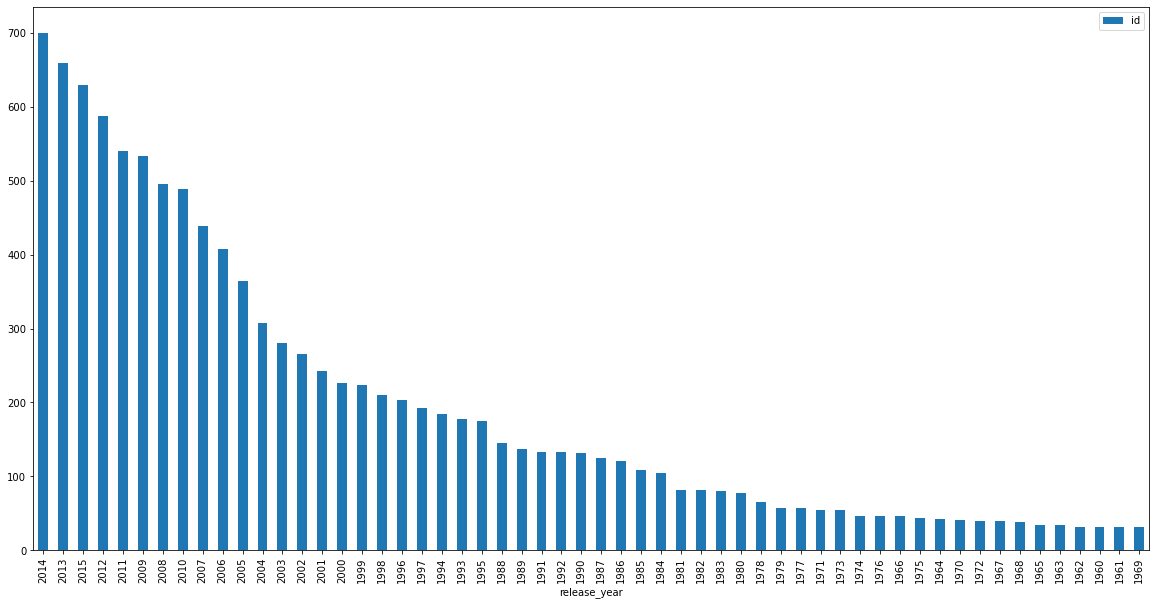

In [16]:
df.groupby('release_year').agg({'id':'count'}).sort_values('id',ascending= False).plot(kind= 'bar', figsize= (20,10));

According to this bar chart, i was able to conclude that movies was release most in 2014,with over 700 movies

### Research Question 2  (Which Year Has The Highest budget ?)

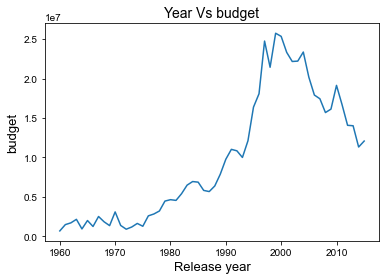

In [17]:
df.groupby('release_year')['budget'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs budget",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('budget',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

According to the plot year more that 2 billion was spent on movies made in 1997-2005 than any other year, so the budget for the movies in these years are high

### Research Question 3  (Which Movie genre is most sorted after  ?)

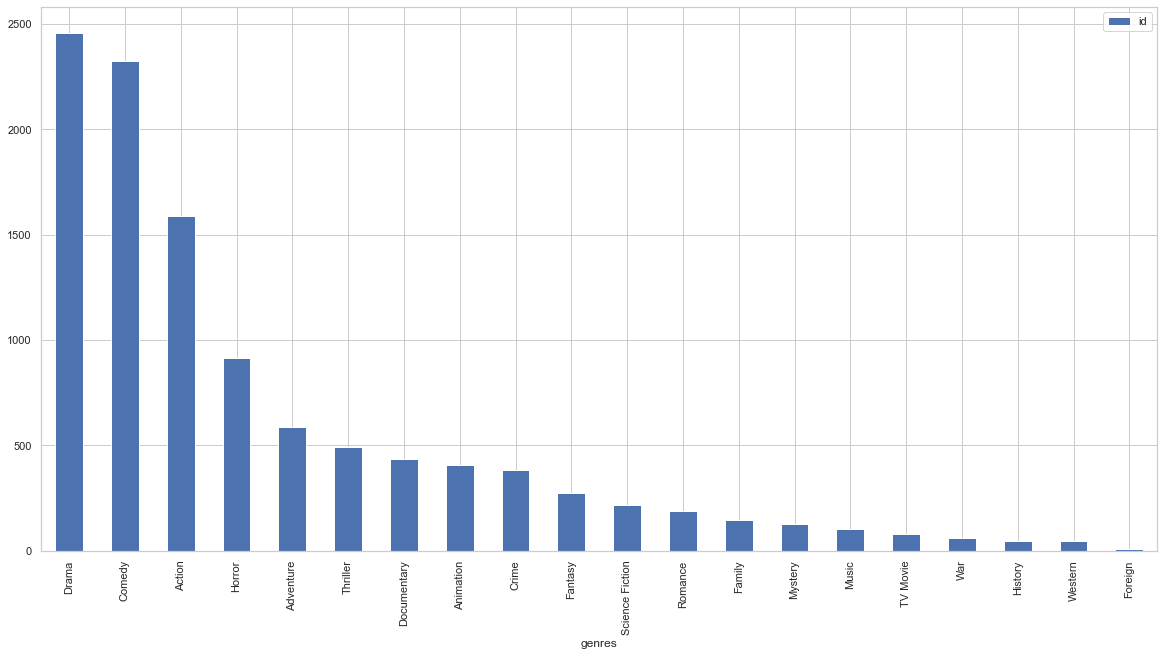

In [18]:
df.groupby('genres').agg({'id':'count'}).sort_values('id',ascending= False).plot(kind= 'bar', figsize= (20,10));

### Research Question 4  (Which Year Has The Highest Revenue ?)

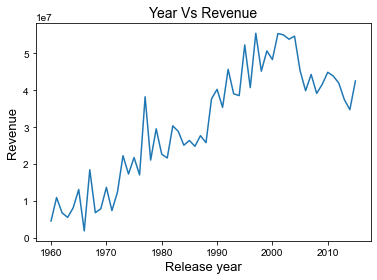

In [15]:
df.groupby('release_year')['revenue'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs Revenue",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

According to the plot year more that 5 billion was gotten from movies made in 1994-2000 than any other year, so the revenue gotten from the movies in these years are high

### Research Question 5  (Which Movie Has The Highest Revenue ?)

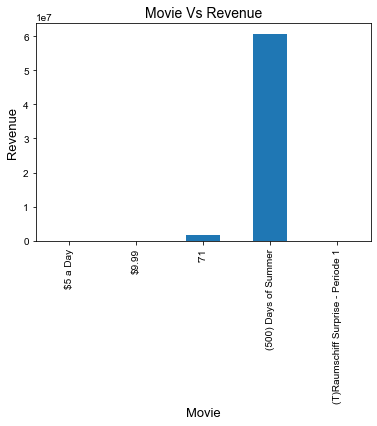

In [13]:
mr = df.groupby('original_title')['revenue'].sum().head(5)
mr.plot(kind= 'bar')

#setup the title and labels of the figure.
plt.title("Movie Vs Revenue",fontsize = 14)
plt.xlabel('Movie',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

According to the plot year more that "(500) Days of Summer" has the highest Revenue

### Research Question 6  (Which Genre Has The Highest Revenue ?)

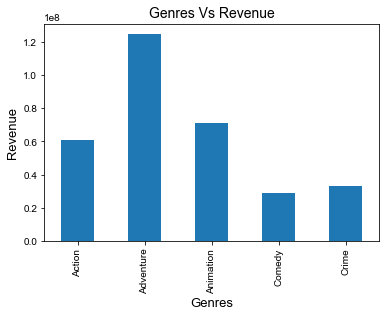

In [13]:
mr = df.groupby('genres')['revenue'].mean().head(5)
mr.plot(kind= 'bar')

#setup the title and labels of the figure.
plt.title("Genres Vs Revenue",fontsize = 14)
plt.xlabel('Genres',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

According to the plot year more that the Genre "Adventure" has the highest Revenue compared to others

<a id='conclusions'></a>
## Conclusions



After analyzing the TMDb Movie Dataset, i can now come to the decision that:
1. 2014 has the highest number of movies released with over 700 movies.
2. The budget for 1997-2005 was very high compared to others.
3. The revenue gotten from 1994-2000 was very high compared to others.
4. Drama is the most popular genre, following by comedy, action, horror and adventure.
5. The movie (original_title) "(500) Days of Summer" had more revenues compared to other movies
6. The genre "Adventure" had more revenues compared to other genre


Limitation 
> During the data cleaning process, I split the genre column seperated it by '|' for easy parsing during the exploration phase. This increases the time taken in calculating the result.